In [1]:
import numpy as np # arrays and data manipulation
import matplotlib.pyplot as plt # data visualization
import pandas as pd # read, clean, and rearrange data
import seaborn as sns # more styles and colors for data visualization on top of matplotlib

from sklearn.datasets import load_breast_cancer # import dataset from sklearn
from sklearn.model_selection import train_test_split # divide data into train and test parts
from sklearn.preprocessing import StandardScaler # feature scaling so that data works with models better
from sklearn.svm import SVC # support vector machine -> support vector classification: scales quadratically with num samples, does well with multiple features, one vs one scheme
from sklearn.metrics import classification_report, confusion_matrix
    # classification report gives metrics like accuracy, precision, f1-score, support
    # confusion matrix gives a confusion matrix (TP, TN, FP, FN) between y_true and y_predict

breast_cancer = load_breast_cancer()

In [2]:
breast_cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [4]:
df_data = np.c_[breast_cancer['data'], breast_cancer['target']] # stack data array next to target array along y-axis (side by side)
df_cols = np.append(breast_cancer['feature_names'], ['target']) # concatenate feature names with a column called 'target' for our df column names
breast_cancer_df = pd.DataFrame(df_data, columns = df_cols)

In [6]:
breast_cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [7]:
breast_cancer_df.shape

(569, 31)

In [8]:
breast_cancer_df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

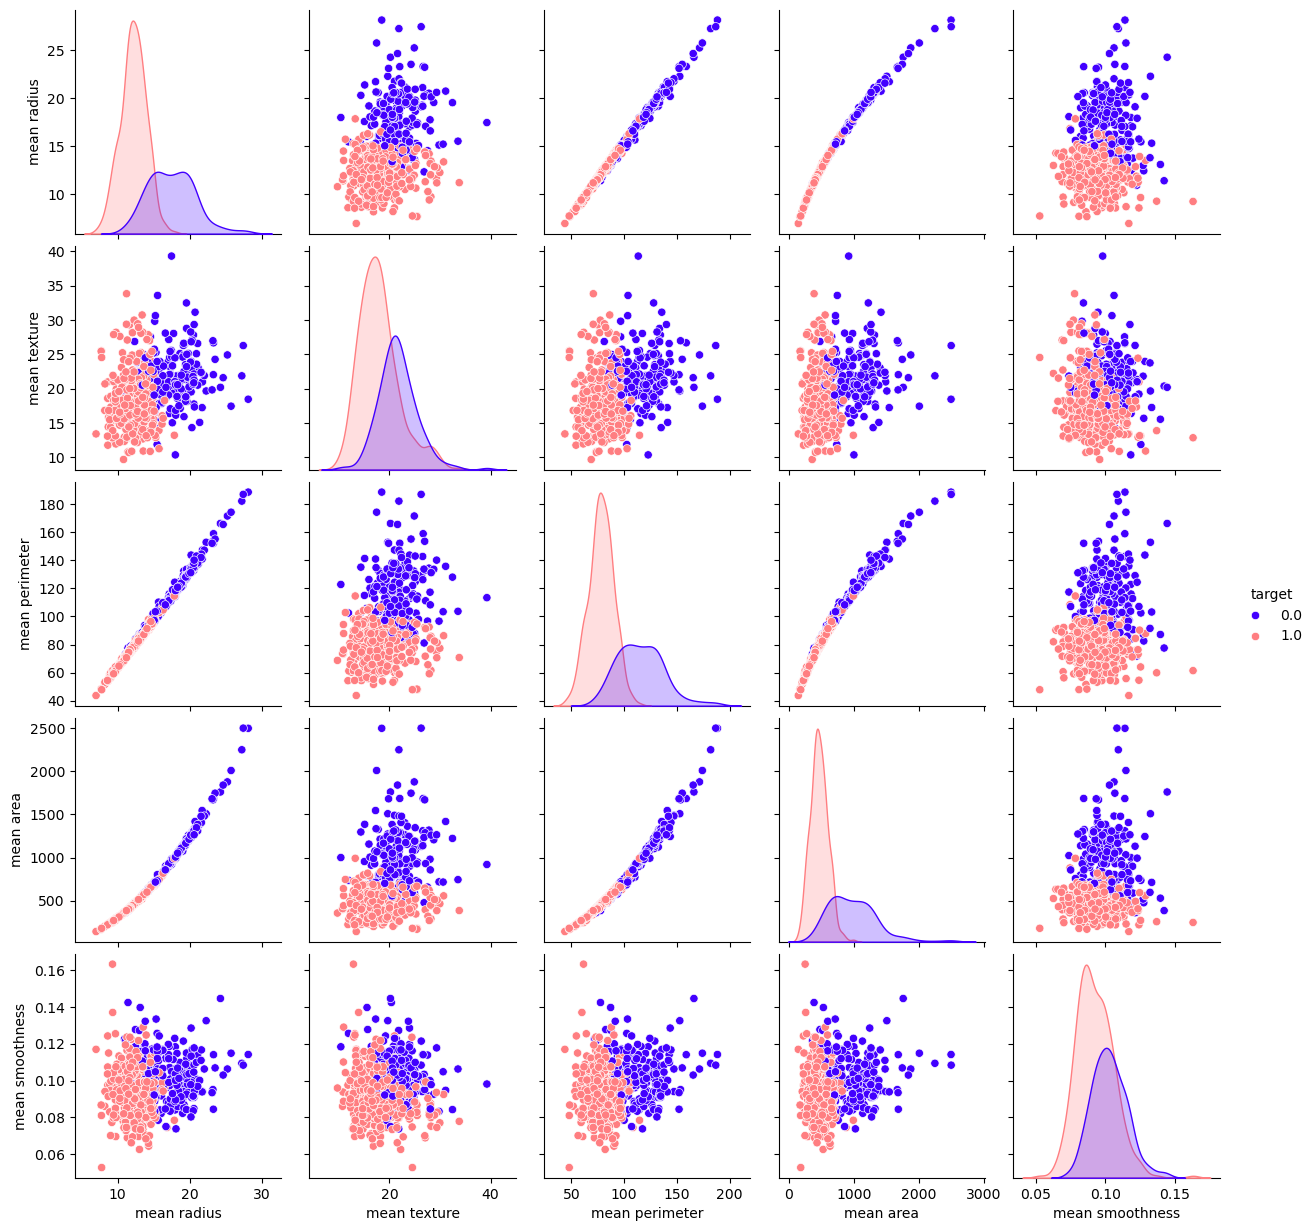

In [9]:
sns.pairplot(breast_cancer_df, hue = 'target', palette = 'gnuplot2', vars = ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness'])
# 5x5 grid of plots of the different vars plotted against each other
# diagonal plots are KDE of each var (kernal density), non-diagonal plots are scatter plots of one var against another var
# colors are by target value so red = benign, blue = malignant

In [10]:
breast_cancer_df['target'].value_counts() # number of occurences of each value within targets

target
1.0    357
0.0    212
Name: count, dtype: int64

<Axes: xlabel='target', ylabel='count'>

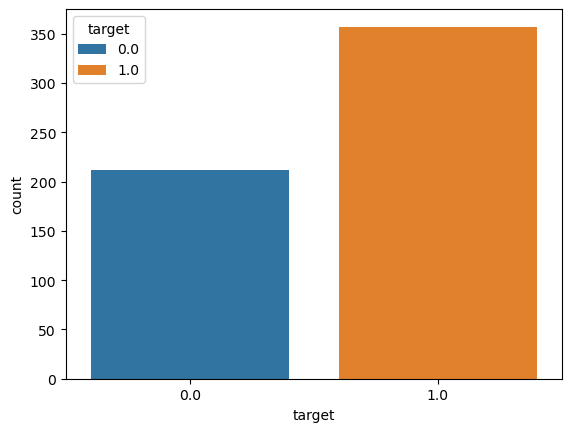

In [11]:
sns.countplot(data = breast_cancer_df, x = 'target', hue = 'target') # plot histogram of number of occurences of each value within targets

In [12]:
train_data = breast_cancer_df.drop(['target'], axis = 1) # training data removes target values
train_data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [13]:
target_data = breast_cancer_df['target'] # target data is only target values
target_data.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: target, dtype: float64

In [14]:
X_train, X_test, y_train, y_test = train_test_split(train_data, target_data, test_size = 0.2, random_state = 20) 
# split train and target data into training and test datasets, 80% data for training, 20% data for testing, reproducible with random state = 20

In [15]:
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train: (455, 30)
X_test: (114, 30)
y_train: (455,)
y_test: (114,)


In [16]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train) # fit: compute mean and stdev of X_train, tranform: scale with fit data of X_train
X_test = sc.transform(X_test) # transform: scale with fit data of X_train

In [17]:
svc_model = SVC()
svc_model.fit(X_train, y_train) # fit the model on training data

SVC()

In [19]:
prediction = svc_model.predict(X_test) # predict test data based on fitted model
confusion_mat = np.array(confusion_matrix(y_test, prediction, labels=[1,0])) # create a confusion matrix with row 0 = 1 (malignant) and row 1 = 0 (benign)
confusion_mat = pd.DataFrame(confusion_mat, index = ["is_malignant", "is_benign"], columns = ["pred_malignant", "pred_benign"]) # convert to df with corresponding row and column names
confusion_mat

,pred_malignant,pred_benign
is_malignant,66,0
is_benign,1,47


In [20]:
print(classification_report(y_test, prediction)) # print classification report of pred vs actual data

              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99        48
         1.0       0.99      1.00      0.99        66

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114

